In [25]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [26]:
df = pd.read_csv("survey.csv")

df_info = df.info()
df_head = df.head()
df_missing = df.isnull().sum()

df_info, df_head, df_missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

(None,
              Timestamp  Age  Gender         Country state self_employed  \
 0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
 1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
 2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
 3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
 4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   
 
   family_history treatment work_interfere    no_employees  ...  \
 0             No       Yes          Often            6-25  ...   
 1             No        No         Rarely  More than 1000  ...   
 2             No        No         Rarely            6-25  ...   
 3            Yes       Yes          Often          26-100  ...   
 4             No        No          Never         100-500  ...   
 
                 leave mental_health_consequence phys_health_consequence  \
 0       Somewhat easy                        No       

In [ ]:
import numpy as np

df["state"].fillna("Unknown", inplace=True)
df["self_employed"].fillna(df["self_employed"].mode()[0], inplace=True)
df["work_interfere"].fillna("Unknown", inplace=True)
df.drop(columns=["comments"], inplace=True)  

df["Gender"] = df["Gender"].str.lower()
gender_map = {
    "male": "Male", "m": "Male", "man": "Male",
    "female": "Female", "f": "Female", "woman": "Female",
    "non-binary": "Other", "nb": "Other", "genderqueer": "Other"
}
df["Gender"] = df["Gender"].replace(gender_map)

# One-hot encoding categorical features
categorical_cols = [
    "self_employed", "family_history", "treatment", "work_interfere",
    "no_employees", "remote_work", "tech_company", "benefits",
    "care_options", "wellness_program", "seek_help", "anonymity",
    "leave", "mental_health_consequence", "phys_health_consequence",
    "coworkers", "supervisor", "mental_health_interview",
    "phys_health_interview", "mental_vs_physical", "obs_consequence"
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()


,Timestamp,Age,Gender,Country,state,self_employed_Yes,family_history_Yes,treatment_Yes,work_interfere_Often,work_interfere_Rarely,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,2014-08-27 11:29:31,37,Female,United States,IL,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,2014-08-27 11:29:37,44,Male,United States,IN,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,2014-08-27 11:29:44,32,Male,Canada,Unknown,0,0,0,0,1,...,1,0,1,0,1,0,1,1,0,0
3,2014-08-27 11:29:46,31,Male,United Kingdom,Unknown,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,1
4,2014-08-27 11:30:22,31,Male,United States,TX,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0


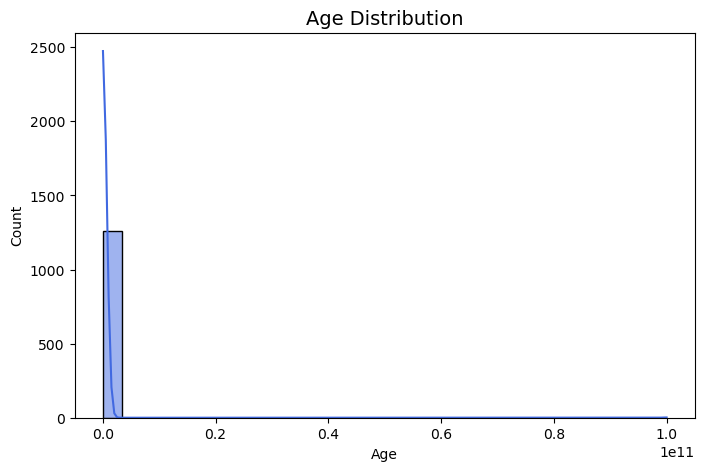

C:\Users\skrih\AppData\Local\Temp\ipykernel_19576\970774241.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False, linewidths=0.5)


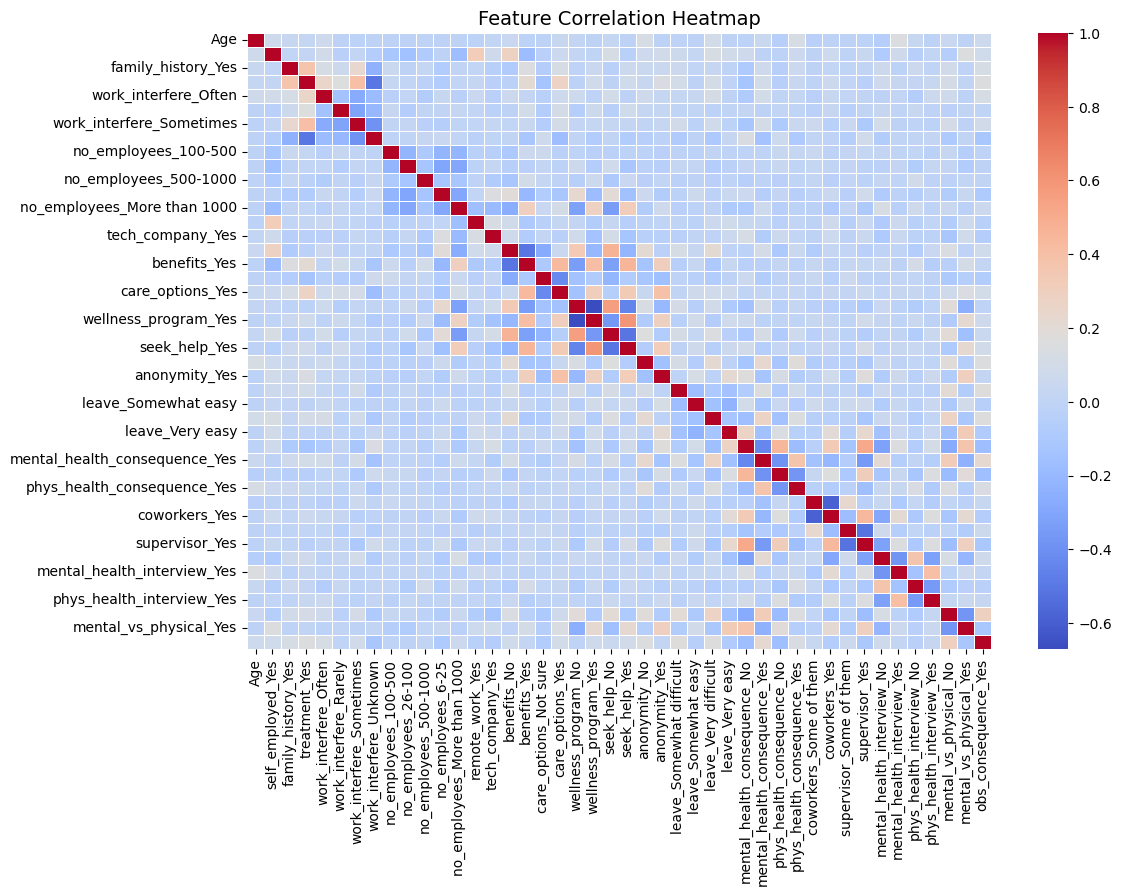

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df_encoded["Age"], bins=30, kde=True, color="royalblue")
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


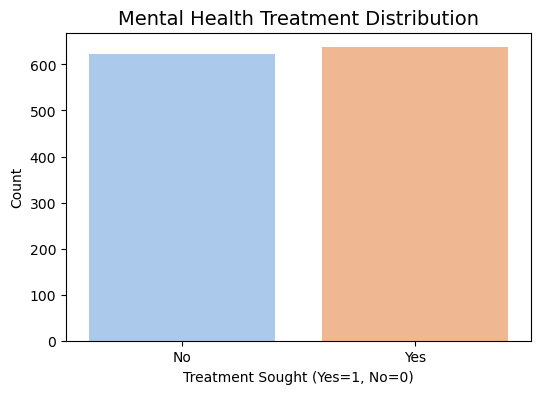

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_encoded["treatment_Yes"], palette="pastel")
plt.title("Mental Health Treatment Distribution", fontsize=14)
plt.xlabel("Treatment Sought (Yes=1, No=0)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()


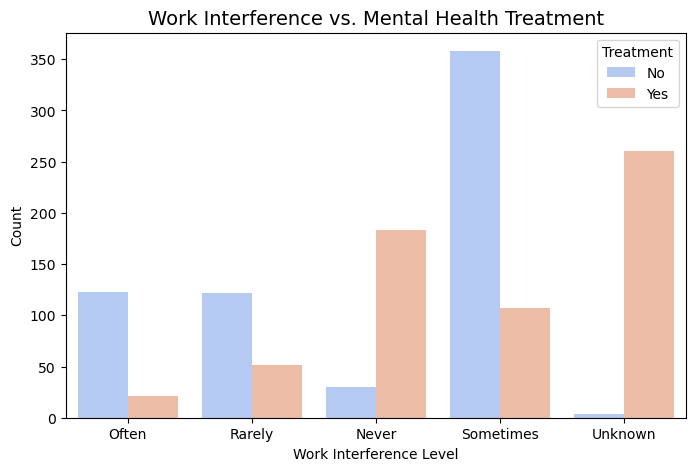

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["work_interfere"].dropna(), hue=df["treatment"], palette="coolwarm")
plt.title("Work Interference vs. Mental Health Treatment", fontsize=14)
plt.xlabel("Work Interference Level")
plt.ylabel("Count")
plt.legend(title="Treatment", labels=["No", "Yes"])
plt.show()


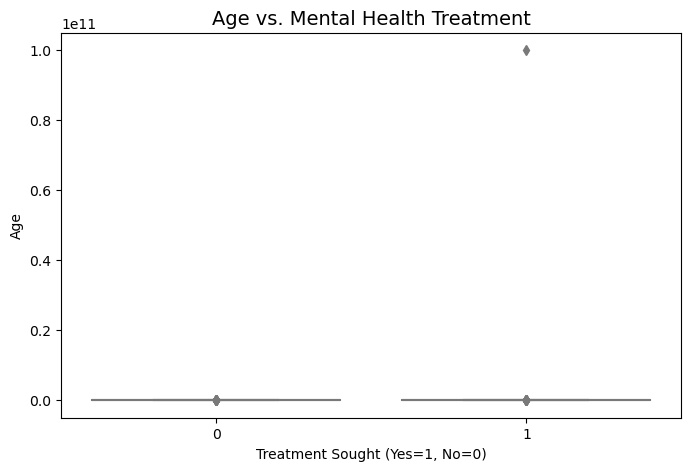

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_encoded["treatment_Yes"], y=df_encoded["Age"], palette="coolwarm")
plt.title("Age vs. Mental Health Treatment", fontsize=14)
plt.xlabel("Treatment Sought (Yes=1, No=0)")
plt.ylabel("Age")
plt.show()


Encoder saved successfully as encoder.pkl!
Timestamp                        int32
Age                              int64
Gender                           int32
Country                          int32
state                            int32
self_employed_Yes                uint8
family_history_Yes               uint8
work_interfere_Often             uint8
work_interfere_Rarely            uint8
work_interfere_Sometimes         uint8
work_interfere_Unknown           uint8
no_employees_100-500             uint8
no_employees_26-100              uint8
no_employees_500-1000            uint8
no_employees_6-25                uint8
no_employees_More than 1000      uint8
remote_work_Yes                  uint8
tech_company_Yes                 uint8
benefits_No                      uint8
benefits_Yes                     uint8
care_options_Not sure            uint8
care_options_Yes                 uint8
wellness_program_No              uint8
wellness_program_Yes             uint8
seek_help_No         

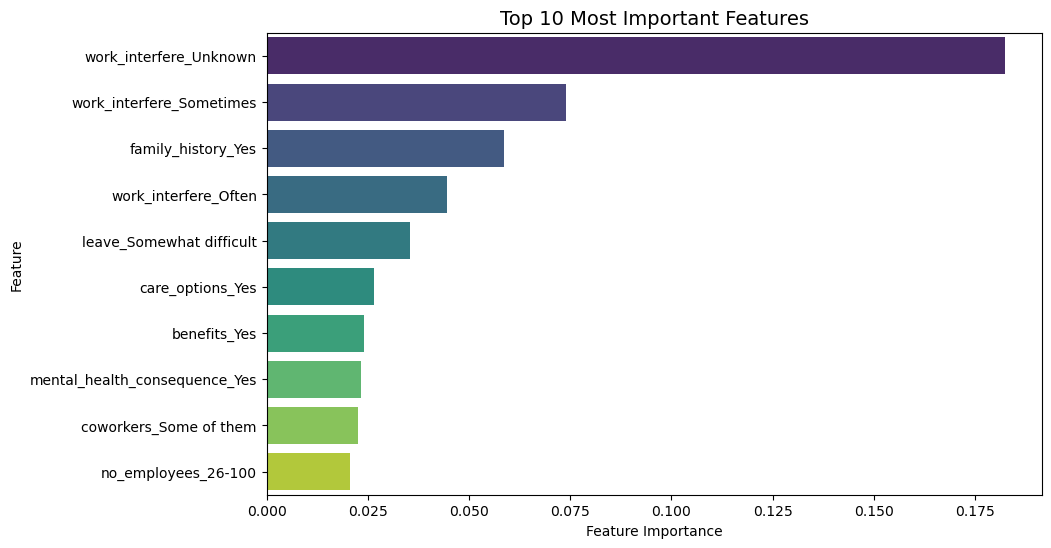

In [23]:
import joblib
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

if "timestamp_column" in df_encoded.columns:  
    df_encoded = df_encoded.drop(columns=["timestamp_column"])

categorical_cols = df_encoded.select_dtypes(include=["object"]).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  

joblib.dump(label_encoders, "encoder.pkl")
print("Encoder saved successfully as encoder.pkl!")

X = df_encoded.drop(columns=["treatment_Yes"])  
y = df_encoded["treatment_Yes"]  

print(X.dtypes)  

feature_importance = mutual_info_classif(X, y)
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df[:10], palette="viridis")
plt.title("Top 10 Most Important Features", fontsize=14)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


c:\Users\skrih\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\skrih\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model Performance Comparison:
                     Accuracy  Precision    Recall  F1-score   ROC-AUC
Random Forest        0.801587   0.751724  0.886179  0.813433  0.887565
XGBoost              0.821429   0.791045  0.861789  0.824903  0.897334
Logistic Regression  0.765873   0.716216  0.861789  0.782288  0.823470

🔥 Best Model: XGBoost
✅ Model saved successfully as 'mental_health_model.pkl'.


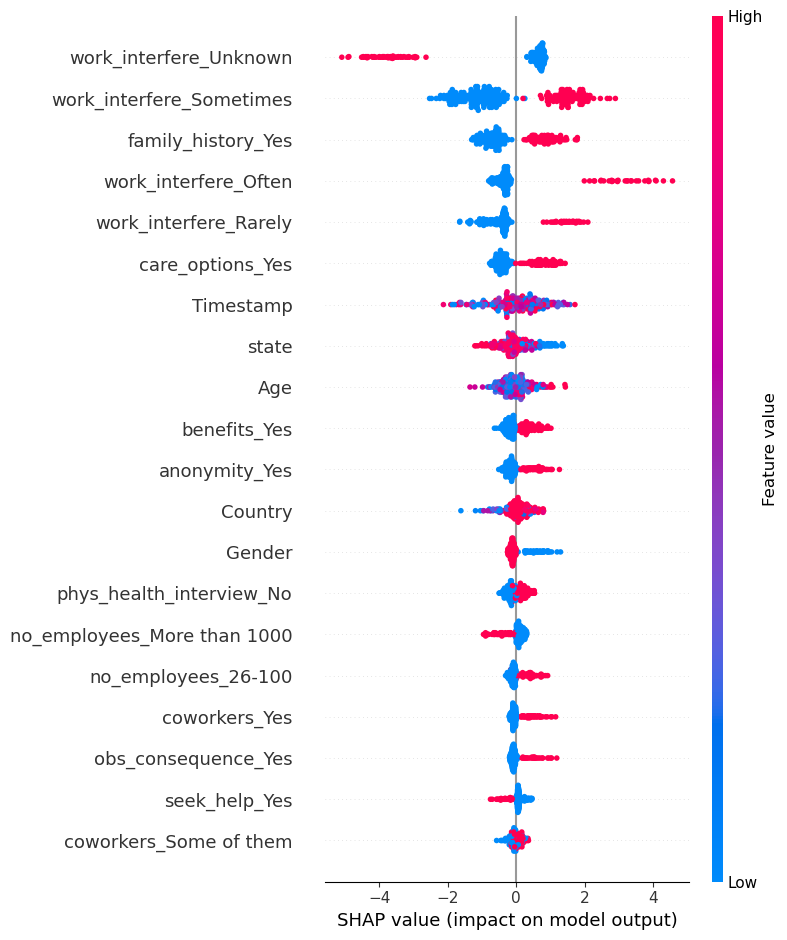

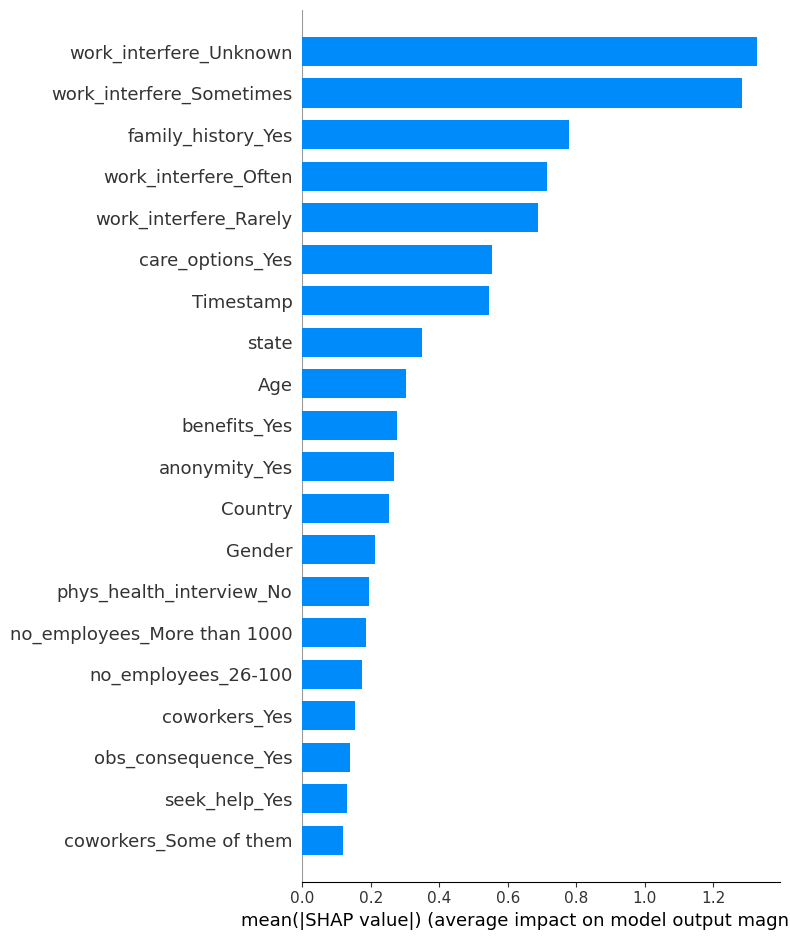

In [ ]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_names = X_train.columns.tolist()  
joblib.dump(feature_names, "feature_names.pkl")  

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "Logistic Regression": LogisticRegression(max_iter=500)
}


results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    average_type = "weighted" if len(set(y)) > 2 else "binary"


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=average_type)
    recall = recall_score(y_test, y_pred, average=average_type)
    f1 = f1_score(y_test, y_pred, average=average_type)

    lb = LabelBinarizer()
    y_test_binarized = lb.fit_transform(y_test)
    y_pred_proba = model.predict_proba(X_test)
    
    if len(set(y)) > 2:  
        lb = LabelBinarizer()
        y_test_binarized = lb.fit_transform(y_test)
        roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, average="weighted", multi_class="ovr")
    else: 
        roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])  


    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC-AUC": roc_auc
    }

results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)

best_model_name = max(results, key=lambda k: results[k]["F1-score"])
best_model = models[best_model_name]
print(f"\n Best Model: {best_model_name}")

joblib.dump(best_model, "mental_health_model.pkl")
print(" Model saved successfully as 'mental_health_model.pkl'.")

if best_model_name in ["Random Forest", "XGBoost"]:
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test)

    shap.summary_plot(shap_values, X_test, feature_names=X.columns)

    shap.summary_plot(shap_values, X_test, plot_type="bar")
